In [1]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)
import tensorflow 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from keras.regularizers import l2
from keras.callbacks import CSVLogger
from tensorflow import keras
from keras import metrics
from keras import backend as K
import numpy as np
import pandas as pd
import time
import pydot
import gensim
from gensim.models import Word2Vec
import string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow 
import tensorflow.keras
import numpy as np
import pandas as pd
import time
import string
import re
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec
from sklearn.metrics import confusion_matrix, roc_curve,  roc_auc_score, classification_report
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Activation
from keras.layers import Embedding, Flatten, Conv1D, SpatialDropout1D,TimeDistributed, MaxPooling1D,AveragePooling1D, merge, concatenate, Input, Dropout, Flatten, LSTM

In [2]:
#membaca data json
df = pd.read_json("data2knewfix.json")
#mengambil kolom data
dff = df['data'][2]
#merubah list data menjadi dataframe
dt=pd.DataFrame(dff,columns=['id_case','class','sentence1','sentence2'])
pd.set_option('display.max_rows', dt.shape[0]+1)
dt

id_case class                                          sentence1  \
0         32     5  Recently, there has been a successful attempt ...   
1         34     5  The first one is the WS-353 dataset (Finkelste...   
2         35     5  Abstract Meaning Representation (AMR) (Banares...   
3         36     5  We perform bootstrap resampling with bounds es...   
4         37     5  It is used to support semantic analyses in HPS...   
5       1201     4  We use Stanford parser (de Marneffe et al., 20...   
6       1202     3  Rooth et al. (1999) propose an Expectation-Max...   
7       1203     3  The Levenshtein distance (Levenshtein, 1966) b...   
8       1204     1  We use the Moses toolkit (Koehn et al., 2007) ...   
9         36     5  We perform bootstrap resampling with bounds es...   
10        37     5  It is used to support semantic analyses in HPS...   
11        38     3  It is used to support semantic analyses in the...   
12        39     4  It is used to support semantic analyses in HPS...   
13        40     4  It is used to support semantic analyses in the...   
14        43     3  We build upon our previous Markov Logic based ...   
15        44     2  Details about SVM and KFD can be found in (Tay...   
16        46     3  We learn the parameters using a quasi-Newton p...   
17        47     5  We use the SCFG decoder cdec (Dyer et al., 201...   
18        48     4  This is known as the Distributional Hypothesis...   
19        49     4  All our models , as well as the parser describ...   
20        51     4  For strings, many such kernel functions exist ...   
21        53     2  The estimation of the semantically Smoothed Pa...   
22        55     2  We train with the Adam optimizer (Kingma and B...   
23        56     3  In our experimental study, we use the freely a...   
24        58     2  More recently, (Carpineto and Romano, 2010) sh...   
25        59     4  They are based on the distributional hypothesi...   
26        60     4  Word alignment is performed using GIZA++ (Och ...   
27        61     4  Word alignment is performed using GIZA++ (Och ...   
28        62     3  We used Mallet software (McCallum, 2002) for C...   
29        63     3  The thesaurus consists of a hierarchy of 2,710...   
30        64     4  The detailed discussion is provided in the lon...   
31        66     4  The first one is the WS- 353 3 dataset (Finkel...   
32        68     3  A framework for human error analysis and error...   
33        69     4  MaxEnt classifier is a good example of this gr...   
34        70     4  Among these media, blog is one of the communic...   
35        71     3  For the gold preprocessing and all 5k settings...   
36        73     2  For preprocessing, we used MADA (Morphological...   
37        74     4  We trained a 5-gram language model on the Xinh...   
38        75     4  To determine semantic type and subtype, we tra...   
39        76     2  We use the scikit implementation of Random For...   
40        78     3  Each term in the input text will be represente...   
41        79     5  An algorithm, the Kuhn-Munkres method (Kuhn, 1...   
42        81     3  We use Collapsed Gibbs Sampling (Griffiths and...   
43        82     5  We use the Stanford dependency parser (Marneff...   
44        83     5  Filter weights are initialized using Glorot-Be...   
45        85     4  Automatic sentence alignment of the training d...   
46        86     2  We use the AdaGrad optimizer (Duchi et al., 20...   
47        87     5  Then we did word alignment using GIZA++ (Och a...   
48        88     4  For example, DIRT (Lin and Pantel, 2001) aims ...   
49        89     3  The annotation was performed manually using th...   
50        91     4  System proposed by (Li et al., 2006 ), uses a ...   
51        92     3  This corpus contains around 11,000 NPs annotat...   
52        93     4  All modules take as input the corpus documents...   
53        95     4  From the pioneering work of (Rapp, 1995 ), 

In [3]:
#cek jumlah dataset dari setiap kelas
dt['class'].value_counts()

5    822
4    714
3    451
2     32
0      6
1      2
Name: class, dtype: int64

In [4]:
#panjang kalimat 
text1 = dt['sentence1'].tolist()
text2 = dt['sentence2'].tolist()
text = [] 
for i in range(0, len(text1)): 
    text.append(text1[i]+text2[i]) 
text

['Recently, there has been a successful attempt to harmonize the linguistic principles behind the coding systems MSD and KR (Farkas et al., 2010 ).Recently, there has been a successful attempt to harmonize the coding systems MSD and KR (Farkas et al., 2010 ).',
 'The first one is the WS-353 dataset (Finkelstein et al., 2001) containing 353 pairs of English words that have been assigned similarity ratings by humans.The first one is the WS-353 dataset (Finkelstein et al., 2001 ), which contains 353 pairs of English words that have been assigned similarity ratings by humans.',
 'Abstract Meaning Representation (AMR) (Banarescu et al., 2013) is a semantic formalism where the meaning of a sentence is encoded as a rooted, directed graph.Abstract Meaning Representation (AMR) (Banarescu et al., 2013) is a semantic formalism encoding the meaning of a sentence as a rooted, directed graph.',
 'We perform bootstrap resampling with bounds estimation as described in (Koehn, 2004 ).We perform bootstr

In [5]:
y = dt['class']
y = to_categorical(y)
print(len(y))

2027


In [6]:
words = text
print(words)

['Recently, there has been a successful attempt to harmonize the linguistic principles behind the coding systems MSD and KR (Farkas et al., 2010 ).Recently, there has been a successful attempt to harmonize the coding systems MSD and KR (Farkas et al., 2010 ).', 'The first one is the WS-353 dataset (Finkelstein et al., 2001) containing 353 pairs of English words that have been assigned similarity ratings by humans.The first one is the WS-353 dataset (Finkelstein et al., 2001 ), which contains 353 pairs of English words that have been assigned similarity ratings by humans.', 'Abstract Meaning Representation (AMR) (Banarescu et al., 2013) is a semantic formalism where the meaning of a sentence is encoded as a rooted, directed graph.Abstract Meaning Representation (AMR) (Banarescu et al., 2013) is a semantic formalism encoding the meaning of a sentence as a rooted, directed graph.', 'We perform bootstrap resampling with bounds estimation as described in (Koehn, 2004 ).We perform bootstrap 

# Text Pre-Processing

In [7]:
#Text Praprocessing
#Mengubah karakter huruf kapital menjadi kecil pada setiap kalimat data latih
import re
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#Menghapus tanda baca pada setiap kalimat data latih
def remove_tandabaca(words):
    new_words = []
    for word in words:
        new_word = word.translate(str.maketrans("","",string.punctuation))
        new_words.append(new_word)
    return new_words

#Menghapus jarak pada setiap kalimat data latih
def remove_space(words):
    new_words = []
    for word in words:
        new_word = word.strip()
        #re.sub(' +', ' ',new_word)
        re.sub(r"^\s+|\s+$", "", new_word)
        new_words.append(new_word)
    return new_words

#Menghapus jarak dan tanda pada setiap kalimat data latih
def text_cleaning(words):
    words = remove_tandabaca(words)
    words = remove_space(words)
    return words

def preprocessing(words):
    words = text_cleaning(words)
    words = to_lowercase(words)
    return words

In [8]:
words = preprocessing(words)

In [9]:
myList = [i.split(' ') for i in words]
print(myList)

[['recently', 'there', 'has', 'been', 'a', 'successful', 'attempt', 'to', 'harmonize', 'the', 'linguistic', 'principles', 'behind', 'the', 'coding', 'systems', 'msd', 'and', 'kr', 'farkas', 'et', 'al', '2010', 'recently', 'there', 'has', 'been', 'a', 'successful', 'attempt', 'to', 'harmonize', 'the', 'coding', 'systems', 'msd', 'and', 'kr', 'farkas', 'et', 'al', '2010'], ['the', 'first', 'one', 'is', 'the', 'ws353', 'dataset', 'finkelstein', 'et', 'al', '2001', 'containing', '353', 'pairs', 'of', 'english', 'words', 'that', 'have', 'been', 'assigned', 'similarity', 'ratings', 'by', 'humansthe', 'first', 'one', 'is', 'the', 'ws353', 'dataset', 'finkelstein', 'et', 'al', '2001', '', 'which', 'contains', '353', 'pairs', 'of', 'english', 'words', 'that', 'have', 'been', 'assigned', 'similarity', 'ratings', 'by', 'humans'], ['abstract', 'meaning', 'representation', 'amr', 'banarescu', 'et', 'al', '2013', 'is', 'a', 'semantic', 'formalism', 'where', 'the', 'meaning', 'of', 'a', 'sentence', '

# Word2Vec

In [52]:
#MEMBUAT MODEL WORD2VEC
word_model = Word2Vec(myList, vector_size=100, min_count=1, window=100, epochs=100, sg=1)
word_model.save("word2vec100size.model")
#word_model.vector_size

In [11]:
word_model.wv.vectors[0]

array([-9.46773067e-02,  1.26244044e-02, -5.27091436e-02,  2.95480317e-03,
        4.10062820e-02,  1.19316176e-01, -5.25676645e-02,  2.30068415e-01,
       -6.50295094e-02,  1.36531785e-01,  3.67199145e-02, -1.22211948e-01,
       -2.69289198e-03,  2.07453385e-01, -1.53254777e-01, -1.63981393e-01,
        3.53320912e-02,  2.02076207e-03,  2.87012551e-02,  1.51144937e-01,
        2.08799336e-02, -1.82594106e-01,  1.15464196e-01,  5.32475784e-02,
        1.09674066e-01, -3.10679595e-03, -1.30360931e-01,  5.31202257e-02,
       -1.69878900e-01,  9.44705121e-03, -2.88689524e-01, -1.07863113e-01,
        1.46902502e-01,  5.31882048e-02, -1.46762386e-01, -7.17220679e-02,
       -1.39304951e-01, -1.13800019e-01, -1.08086981e-01, -2.14413077e-01,
        1.38993904e-01, -5.96599057e-02,  1.48765281e-01,  8.59705955e-02,
       -5.40530235e-02, -3.43759730e-02,  3.90572585e-02, -4.16948311e-02,
       -8.07464197e-02, -2.30369091e-01,  8.49383324e-02, -1.54071683e-02,
        1.85781017e-01, -

In [12]:
print(word_model.wv['statistics'])
#print(word_model.wv['clustering'])
#print(word_model.wv['there'])

[-0.87802404  1.1083016   0.38969934 -1.2720494  -0.48987934  0.87880415
 -0.22740059  0.5066844  -0.81864494  0.4481734  -0.13409117 -0.37160555
 -0.38368306  0.19994996 -1.1224282  -1.2464976  -0.5951635   0.09201285
  0.5182235   0.5481711   0.742118   -1.5851791  -1.331215   -0.44500828
 -0.52966726 -0.37613887 -0.00505786  0.30717102 -0.81894904  0.6706892
 -1.289368   -1.1493298   0.03735625  0.37116766 -0.21484557 -0.06848259
  0.7646376   0.5606158   0.12291881 -2.9822853   0.5456813   0.5404719
  0.565694   -0.82548976  0.46083176 -0.7090373   0.23422575 -0.13807736
  0.03299898  1.7726477  -0.6562814  -0.6548283   0.13897423 -0.5415289
 -0.5226813   0.3196506  -0.13509631 -0.38003245  0.01081783  0.78789294
 -0.18371573  0.13364471  0.5625274  -1.1668817  -0.46419784  0.4051894
  0.12739381  0.45477036  0.6626837   1.0067828   0.11132859  0.15231405
  1.0477394  -0.10396194  0.5787619  -0.6831289  -0.47157776  0.7232447
 -0.6636336  -0.55935997 -0.10491557  0.21495707  0.9077

In [13]:
#Mengambil bobot word2vec
embedding_matrix = word_model.wv.vectors
embedding_matrix.shape

(3446, 100)

In [14]:
top_words = embedding_matrix.shape[0]

In [15]:
#merubah kata menjadi token
token = Tokenizer(num_words=top_words)
token.fit_on_texts(words)
sequences = token.texts_to_sequences(words)
sequences

[[439,
  523,
  129,
  123,
  7,
  1403,
  1116,
  9,
  1404,
  1,
  603,
  2140,
  2141,
  1,
  755,
  49,
  888,
  4,
  1405,
  1406,
  2,
  3,
  117,
  439,
  523,
  129,
  123,
  7,
  1403,
  1116,
  9,
  1404,
  1,
  755,
  49,
  888,
  4,
  1405,
  1406,
  2,
  3,
  117],
 [1,
  118,
  145,
  13,
  1,
  1117,
  183,
  889,
  2,
  3,
  156,
  890,
  756,
  218,
  5,
  44,
  63,
  34,
  95,
  123,
  757,
  142,
  891,
  26,
  1407,
  118,
  145,
  13,
  1,
  1117,
  183,
  889,
  2,
  3,
  156,
  42,
  240,
  756,
  218,
  5,
  44,
  63,
  34,
  95,
  123,
  757,
  142,
  891,
  26,
  1408],
 [892,
  157,
  287,
  1409,
  1410,
  2,
  3,
  88,
  13,
  7,
  130,
  671,
  319,
  1,
  157,
  5,
  7,
  136,
  13,
  2142,
  31,
  7,
  1411,
  1412,
  2143,
  157,
  287,
  1409,
  1410,
  2,
  3,
  88,
  13,
  7,
  130,
  671,
  2144,
  1,
  157,
  5,
  7,
  136,
  31,
  7,
  1411,
  1412,
  758],
 [6,
  262,
  77,
  80,
  14,
  604,
  411,
  31,
  138,
  8,
  12,
  36,
  6,
  262,
  77,

In [16]:
token.index_word

{1: 'the',
 2: 'et',
 3: 'al',
 4: 'and',
 5: 'of',
 6: 'we',
 7: 'a',
 8: 'in',
 9: 'to',
 10: 'using',
 11: 'for',
 12: 'koehn',
 13: 'is',
 14: 'with',
 15: 'used',
 16: '2007',
 17: 'moses',
 18: 'use',
 19: 'model',
 20: 'toolkit',
 21: 'from',
 22: 'corpus',
 23: 'on',
 24: 'our',
 25: '2011',
 26: 'by',
 27: 'phrasebased',
 28: 'data',
 29: 'system',
 30: 'word',
 31: 'as',
 32: 'are',
 33: 'was',
 34: 'that',
 35: 'translation',
 36: '2004',
 37: '2006',
 38: 'smt',
 39: 'stanford',
 40: '2005',
 41: 'language',
 42: 'which',
 43: '2003',
 44: 'english',
 45: 'ney',
 46: 'training',
 47: 'och',
 48: 'this',
 49: 'systems',
 50: 'trained',
 51: 'all',
 52: 'parser',
 53: '2014',
 54: 'europarl',
 55: 'dependency',
 56: 'machine',
 57: '2009',
 58: 'experiments',
 59: 'giza',
 60: 'standard',
 61: 'based',
 62: 'task',
 63: 'words',
 64: '2012',
 65: 'models',
 66: 'built',
 67: 'were',
 68: 'an',
 69: 'train',
 70: 'statistical',
 71: 'marneffe',
 72: 'similar',
 73: 'alignment'

In [17]:
sequences = np.array(sequences)
sequences

C:\Users\DEVYRI~1\AppData\Local\Temp/ipykernel_16572/551347806.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sequences = np.array(sequences)


array([list([439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 603, 2140, 2141, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117, 439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117]),
       list([1, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 890, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1407, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 42, 240, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1408]),
       list([892, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 319, 1, 157, 5, 7, 136, 13, 2142, 31, 7, 1411, 1412, 2143, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 2144, 1, 157, 5, 7, 136, 31, 7, 1411, 1412, 758]),
       ...,
       list([48, 384, 5, 1027, 250, 33, 318, 15, 26, 1028, 2, 3, 40, 294, 2139, 4, 86, 3444, 231, 1028, 2, 3, 40, 2133, 1, 18, 5, 1027, 93, 26, 10, 600, 378]),
       list([48, 384, 5, 1027, 250, 33, 318, 15, 26, 1028, 2, 3, 40, 294, 2139, 4, 86, 3445, 1399, 286, 5, 1, 97, 103, 14, 1027, 93, 13, 1400, 602, 34, 5, 

In [18]:
encoded_text = token.texts_to_sequences(words)
print(encoded_text)

[[439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 603, 2140, 2141, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117, 439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117], [1, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 890, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1407, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 42, 240, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1408], [892, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 319, 1, 157, 5, 7, 136, 13, 2142, 31, 7, 1411, 1412, 2143, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 2144, 1, 157, 5, 7, 136, 31, 7, 1411, 1412, 758], [6, 262, 77, 80, 14, 604, 411, 31, 138, 8, 12, 36, 6, 262, 77, 80, 14, 604, 411, 31, 138, 26, 12, 36], [98, 13, 15, 9, 158, 130, 320, 8, 264, 44, 251, 146, 380, 277, 4, 321, 84, 241, 76, 8, 205, 146, 440, 252, 759, 13, 15, 9, 158, 130, 320, 8, 1, 264, 44, 251, 146, 277, 4, 321, 84, 241, 76, 8, 205, 146, 440, 252, 760], [6, 18, 39, 52, 74, 71, 2, 3, 37, 9, 210, 16

In [19]:
max_kata = 50
#melakukan padding pada kalimat dengan ukuran maks 50 kata jika kurang maka di isi nol di akhir(POST)
X = pad_sequences(encoded_text, maxlen = max_kata, padding='post')
X

array([[ 439,  523,  129, ...,    0,    0,    0],
       [   1,  118,  145, ...,  891,   26, 1408],
       [ 892,  157,  287, ...,    0,    0,    0],
       ...,
       [  48,  384,    5, ...,    0,    0,    0],
       [  48,  384,    5, ...,    0,    0,    0],
       [  91,  379,   13, ...,    0,    0,    0]])

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 40, test_size = 0.2)

In [21]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)
X_test

array([[  11,    1,  226, ...,    0,    0,    0],
       [  26,  726,  699, ...,    0,    0,    0],
       [   6,  492,  750, ...,    0,    0,    0],
       ...,
       [1904, 2763,   13, ...,    0,    0,    0],
       [   6,   15,    1, ...,    0,    0,    0],
       [ 118,    6,   15, ...,    0,    0,    0]])

In [22]:
Y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [56]:
#kv = word_model.wv
#kv.vectors
#out_weights = word_model.syn1neg
#print(out_weights)
vocab, vectors = word_model.wv.key_to_index, word_model.wv.vectors

# get label and vector index.
label_index = np.array([(voc[0], voc[1]) for voc in vocab.items()])

# init dataframe using embedding vectors and set index as node name
tmp =  pd.DataFrame(vectors[label_index[:,1].astype(int)])
tmp.index = label_index[:, 0]
tmp.to_csv("matrix_with_labels.csv")


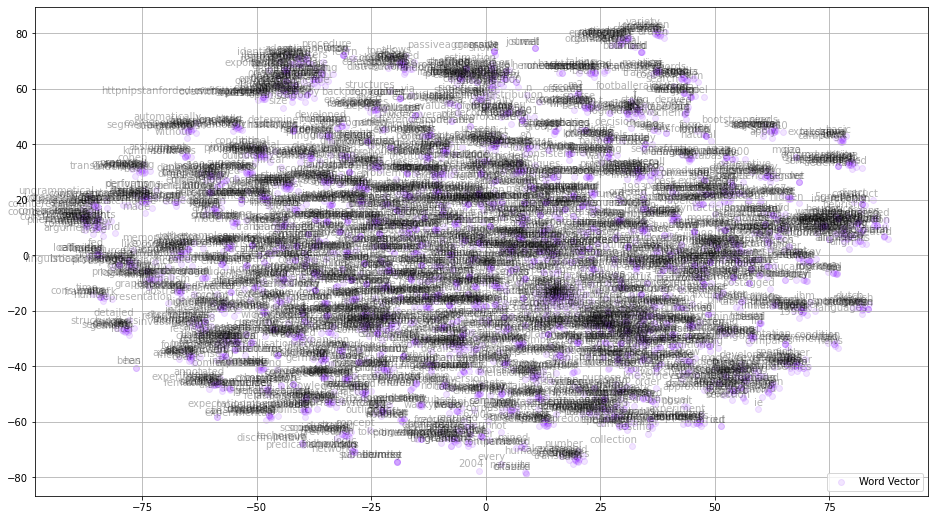

In [98]:
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm

words_ak = []
embeddings_ak = []
for word in list(word_model.wv.key_to_index):
    embeddings_ak.append(word_model.wv[word])
    words_ak.append(word)
    
tsne_ak_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)


def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Word Vector', embeddings_ak_2d, words_ak, a=0.1)

# Model CNN dan RNN

In [24]:
def rec(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def prec(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [25]:
def check_model(model,x,y,epoch,log): 
    #SGD batch size = 16
    model.fit(x, y, validation_split = 0.33, epochs=epoch, batch_size=16, callbacks=[log])
    return model

In [26]:
#Adam
def simple_model(embedding_vocab,embedding_size,bobot,max_kata,opt, output_dim=100, max_length=max_kata, y_dim=6, num_filters=64, filter_sizes = [2,3,4], pooling = 'max', pool_padding = 'valid', dropout=0.5):
    model = Sequential()
    embedding_layer = Embedding(embedding_vocab,embedding_size,weights=[bobot], input_length = max_kata, trainable=True)
    model.add(embedding_layer)
    #CNN Layer
    model.add(Conv1D(64, kernel_size=3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=3,strides=1, padding='valid'))
    model.add(Conv1D(128, kernel_size=3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=3,strides=1, padding='valid'))
    model.add(Conv1D(256, kernel_size=3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=3,strides=1, padding='valid'))
    model.add(Dropout(0.5))
    #LSTM Layer
    model.add(LSTM(64, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(128,return_sequences=True))
    model.add(LSTM(256))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', prec, rec])
    #plot_model(model, to_file='CNN-LSTM-Adam.png')
    return model

In [34]:
#Adadelta
def simple_modeladadelta(embedding_vocab,embedding_size,bobot,max_kata,opt, output_dim=100, max_length=max_kata, y_dim=6, num_filters=64, filter_sizes = [2,3,4],dropout=0.5):
    model = Sequential()
    embedding_layer = Embedding(embedding_vocab,embedding_size,weights=[bobot], input_length = max_kata, trainable=True)
    model.add(embedding_layer)
    #CNN Layer
    model.add(Conv1D(64, kernel_size=3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=3,strides=1, padding='valid'))
    model.add(Conv1D(128, kernel_size=3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=3,strides=1, padding='valid'))
    model.add(Conv1D(256, kernel_size=3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=3,strides=1, padding='valid'))
    model.add(Dropout(0.5))
    #LSTM Layer
    model.add(LSTM(64, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(128,return_sequences=True))
    model.add(LSTM(256))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', prec, rec])
    #plot_model(model, to_file='CNN-LSTM-Adam.png')
    return model

In [35]:
#SGD
def simple_modelsgd(embedding_vocab,embedding_size,bobot,max_kata,opt, output_dim=100, max_length=max_kata, y_dim=6, num_filters=64, filter_sizes = [2,3,4], pooling = 'max', pool_padding = 'valid', dropout=0.5):
    model = Sequential()
    embedding_layer = Embedding(embedding_vocab,embedding_size,weights=[bobot], input_length = max_kata, trainable=True)
    model.add(embedding_layer)
    #CNN Layer
    model.add(Conv1D(64, kernel_size=3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=3,strides=1, padding='valid'))
    model.add(Conv1D(128, kernel_size=3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=3,strides=1, padding='valid'))
    model.add(Conv1D(256, kernel_size=3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=3,strides=1, padding='valid'))
    model.add(Dropout(0.5))
    #LSTM Layer
    model.add(LSTM(64, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(128,return_sequences=True))
    model.add(LSTM(256))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', prec, rec])
    #plot_model(model, to_file='CNN-LSTM-Adam.png')
    return model

In [36]:
def score(history,x,y,name,latih):
    scores = history.evaluate(x, y)
    print(name)
    print(latih+" %s: %.2f%%" % (history.metrics_names[1], scores[1]*100))
    print(latih+" %s: %f " % (history.metrics_names[0], scores[0]*100))

In [37]:
def plot_cm(history,x,y):
    from sklearn.metrics import classification_report
    y_pred = history.predict_classes(x)
    rounded_labels=np.argmax(y, axis=1)
    my_color = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r, hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako, mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
    mat = confusion_matrix(rounded_labels, y_pred)
    class_names = ['Opposite', 'Related','No Aligment', 'Spesific', 'Similar', 'Equivalent']
    plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.OrRd , colorbar=True)
    print(classification_report(rounded_labels, y_pred))

In [38]:
def plot_history_model(log_data,name, iterasi):
    # summarize history for accuracy
    new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']
    primes = list(range(1, iterasi+1))
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.rcParams.update({'font.size': 19})
    plt.plot(primes,log_data['accuracy'], label='acc', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_accuracy'], label='val_acc', color=new_colors[1],linewidth=2)
    plt.title('Model accuracy ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    # summarize history for loss
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.plot(primes,log_data['loss'], label='loss', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_loss'], label='val_loss', color=new_colors[1],linewidth=2)
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    # summarize history for precision
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.plot(primes,log_data['prec'], label='prec', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_prec'], label='val_prec', color=new_colors[1],linewidth=2)
    plt.title('Model Precision')
    plt.ylabel('Precision')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    # summarize history for Recall
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.plot(primes,log_data['rec'], label='rec', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_rec'], label='val_rec', color=new_colors[1],linewidth=2)
    plt.title('Model Recall')
    plt.ylabel('Recall')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [39]:
X_train.shape

(1621, 50)

In [40]:
log = CSVLogger('hybridadam.log', separator=',', append=False)
logsgd = CSVLogger('hybridsgd.log', separator=',', append=False)
logadadelta = CSVLogger('hybridadadelta.log', separator=',', append=False)
iterasi = 100
adadelta = keras.optimizers.Adadelta(lr=0.5, rho=0.95, epsilon=1e-08, decay=0)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.9999,epsilon=1e-09)
#Adam
print("Start Training Model Adam")
start_time = time.time()
historyadam = check_model(simple_model(embedding_matrix.shape[0],embedding_matrix.shape[1],embedding_matrix,max_kata,adam),X_train,Y_train,iterasi,log)
print("\nStop Training")
timeadam = ((time.time() - start_time)/60)
print("Duration Learning : ",((time.time() - start_time)/60))
#SGD
print("Start Training Model SGD")
start_time = time.time()
historysgd = check_model(simple_modelsgd(embedding_matrix.shape[0],embedding_matrix.shape[1],embedding_matrix,max_kata,"sgd"),X_train,Y_train,iterasi,logsgd)
print("\nStop Training")
timesgd = ((time.time() - start_time)/60)
print("Duration Learning : ",((time.time() - start_time)/60))
#AdaDelta
print("Start Training Model Adadelta")
start_time = time.time()
historyadadelta = check_model(simple_modeladadelta(embedding_matrix.shape[0],embedding_matrix.shape[1],embedding_matrix,max_kata,adadelta),X_train,Y_train,iterasi,logadadelta)
print("\nStop Training")
timeadadelta = ((time.time() - start_time)/60)
print("Duration Learning : ",((time.time() - start_time)/60))

Start Training Model Adam
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           344600    
                                                                 
 conv1d_3 (Conv1D)           (None, 48, 64)            19264     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 46, 64)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 44, 128)           24704     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 42, 128)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)          

68/68 [==============================] - 7s 100ms/step - loss: 0.1227 - accuracy: 0.9586 - prec: 0.9703 - rec: 0.9550 - val_loss: 1.6560 - val_accuracy: 0.7364 - val_prec: 0.7581 - val_rec: 0.7353
Epoch 67/100
68/68 [==============================] - 7s 100ms/step - loss: 0.1273 - accuracy: 0.9613 - prec: 0.9690 - rec: 0.9531 - val_loss: 1.6204 - val_accuracy: 0.7477 - val_prec: 0.7661 - val_rec: 0.7426
Epoch 68/100
68/68 [==============================] - 7s 103ms/step - loss: 0.1155 - accuracy: 0.9650 - prec: 0.9674 - rec: 0.9550 - val_loss: 1.6583 - val_accuracy: 0.7308 - val_prec: 0.7412 - val_rec: 0.7261
Epoch 69/100
68/68 [==============================] - 7s 102ms/step - loss: 0.1403 - accuracy: 0.9540 - prec: 0.9627 - rec: 0.9501 - val_loss: 1.6542 - val_accuracy: 0.7346 - val_prec: 0.7517 - val_rec: 0.7335
Epoch 70/100
68/68 [==============================] - 7s 102ms/step - loss: 0.1585 - accuracy: 0.9576 - prec: 0.9661 - rec: 0.9494 - val_loss: 1.4750 - val_accuracy: 0.7383 

68/68 [==============================] - 33s 127ms/step - loss: 1.4716 - accuracy: 0.3867 - prec: 0.0000e+00 - rec: 0.0000e+00 - val_loss: 1.2496 - val_accuracy: 0.3850 - val_prec: 0.0000e+00 - val_rec: 0.0000e+00
Epoch 2/100
68/68 [==============================] - 7s 105ms/step - loss: 1.2151 - accuracy: 0.3969 - prec: 0.0551 - rec: 0.0074 - val_loss: 1.1920 - val_accuracy: 0.4411 - val_prec: 0.0000e+00 - val_rec: 0.0000e+00
Epoch 3/100
68/68 [==============================] - 8s 112ms/step - loss: 1.1793 - accuracy: 0.3886 - prec: 0.1850 - rec: 0.0165 - val_loss: 1.1964 - val_accuracy: 0.3850 - val_prec: 0.0000e+00 - val_rec: 0.0000e+00
Epoch 4/100
68/68 [==============================] - 9s 134ms/step - loss: 1.1847 - accuracy: 0.4024 - prec: 0.3100 - rec: 0.0441 - val_loss: 1.1797 - val_accuracy: 0.3551 - val_prec: 0.0000e+00 - val_rec: 0.0000e+00
Epoch 5/100
68/68 [==============================] - 8s 114ms/step - loss: 1.1722 - accuracy: 0.3996 - prec: 0.2118 - rec: 0.0249 - val

68/68 [==============================] - 8s 120ms/step - loss: 0.2798 - accuracy: 0.9116 - prec: 0.9163 - rec: 0.9015 - val_loss: 1.1568 - val_accuracy: 0.7121 - val_prec: 0.7201 - val_rec: 0.7090
Epoch 79/100
68/68 [==============================] - 9s 139ms/step - loss: 0.2917 - accuracy: 0.9098 - prec: 0.9195 - rec: 0.9051 - val_loss: 1.2145 - val_accuracy: 0.7028 - val_prec: 0.7051 - val_rec: 0.6962
Epoch 80/100
68/68 [==============================] - 8s 110ms/step - loss: 0.2893 - accuracy: 0.9134 - prec: 0.9226 - rec: 0.9023 - val_loss: 1.1832 - val_accuracy: 0.6804 - val_prec: 0.6886 - val_rec: 0.6815
Epoch 81/100
68/68 [==============================] - 8s 111ms/step - loss: 0.2938 - accuracy: 0.8959 - prec: 0.9046 - rec: 0.8896 - val_loss: 1.1519 - val_accuracy: 0.7159 - val_prec: 0.7208 - val_rec: 0.7145
Epoch 82/100
68/68 [==============================] - 8s 112ms/step - loss: 0.2194 - accuracy: 0.9300 - prec: 0.9391 - rec: 0.9254 - val_loss: 1.2017 - val_accuracy: 0.7140 

Epoch 3/100
68/68 [==============================] - 8s 120ms/step - loss: 1.1606 - accuracy: 0.4134 - prec: 0.4584 - rec: 0.1364 - val_loss: 1.1473 - val_accuracy: 0.4262 - val_prec: 0.5391 - val_rec: 0.2033
Epoch 4/100
68/68 [==============================] - 8s 118ms/step - loss: 1.1285 - accuracy: 0.4401 - prec: 0.4694 - rec: 0.1682 - val_loss: 1.1364 - val_accuracy: 0.4262 - val_prec: 0.2353 - val_rec: 0.0165
Epoch 5/100
68/68 [==============================] - 8s 119ms/step - loss: 1.1237 - accuracy: 0.4374 - prec: 0.4921 - rec: 0.1675 - val_loss: 1.1107 - val_accuracy: 0.4430 - val_prec: 0.5443 - val_rec: 0.2014
Epoch 6/100
68/68 [==============================] - 8s 120ms/step - loss: 1.1002 - accuracy: 0.4540 - prec: 0.5431 - rec: 0.2061 - val_loss: 1.1016 - val_accuracy: 0.4748 - val_prec: 0.5536 - val_rec: 0.1549
Epoch 7/100
68/68 [==============================] - 9s 126ms/step - loss: 1.0752 - accuracy: 0.4696 - prec: 0.5945 - rec: 0.2177 - val_loss: 1.0861 - val_accuracy:

68/68 [==============================] - 7s 100ms/step - loss: 0.0574 - accuracy: 0.9761 - prec: 0.9815 - rec: 0.9733 - val_loss: 1.8213 - val_accuracy: 0.7477 - val_prec: 0.7572 - val_rec: 0.7458
Epoch 81/100
68/68 [==============================] - 7s 99ms/step - loss: 0.0705 - accuracy: 0.9715 - prec: 0.9775 - rec: 0.9678 - val_loss: 1.7695 - val_accuracy: 0.7664 - val_prec: 0.7670 - val_rec: 0.7587
Epoch 82/100
68/68 [==============================] - 7s 97ms/step - loss: 0.0710 - accuracy: 0.9687 - prec: 0.9757 - rec: 0.9677 - val_loss: 1.7745 - val_accuracy: 0.7514 - val_prec: 0.7572 - val_rec: 0.7495
Epoch 83/100
68/68 [==============================] - 7s 97ms/step - loss: 0.0472 - accuracy: 0.9761 - prec: 0.9770 - rec: 0.9733 - val_loss: 1.8433 - val_accuracy: 0.7626 - val_prec: 0.7677 - val_rec: 0.7623
Epoch 84/100
68/68 [==============================] - 7s 97ms/step - loss: 0.0559 - accuracy: 0.9761 - prec: 0.9803 - rec: 0.9732 - val_loss: 1.8158 - val_accuracy: 0.7533 - va

In [41]:
score(historyadam,X_train,Y_train,"Adam","Data Latih")
score(historysgd,X_train,Y_train,"SGD","Data Latih")
score(historyadadelta,X_train,Y_train,"Adadelta","Data Latih")

51/51 [==============================] - 3s 49ms/step - loss: 0.5506 - accuracy: 0.8859 - prec: 0.8927 - rec: 0.8826
Adam
Data Latih accuracy: 88.59%
Data Latih loss: 55.059910 
51/51 [==============================] - 2s 44ms/step - loss: 0.5079 - accuracy: 0.8834 - prec: 0.8902 - rec: 0.8765
SGD
Data Latih accuracy: 88.34%
Data Latih loss: 50.793993 
51/51 [==============================] - 2s 45ms/step - loss: 0.6887 - accuracy: 0.9038 - prec: 0.9056 - rec: 0.9000
Adadelta
Data Latih accuracy: 90.38%
Data Latih loss: 68.870443 


In [42]:
print(timeadam)
print(timesgd)
print(timeadadelta)

12.611002973715465
14.429472001393636
12.61613758802414


In [43]:
score(historyadam,X_test,Y_test,"Adam","Data Uji")
score(historysgd,X_test,Y_test,"SGD","Data Uji")
score(historyadadelta,X_test,Y_test,"Adadelta","Data Uji")

13/13 [==============================] - 1s 46ms/step - loss: 1.5488 - accuracy: 0.7217 - prec: 0.7342 - rec: 0.7109
Adam
Data Uji accuracy: 72.17%
Data Uji loss: 154.882216 
13/13 [==============================] - 1s 42ms/step - loss: 1.3481 - accuracy: 0.7069 - prec: 0.7090 - rec: 0.6941
SGD
Data Uji accuracy: 70.69%
Data Uji loss: 134.807420 
13/13 [==============================] - 1s 45ms/step - loss: 2.2988 - accuracy: 0.7143 - prec: 0.7155 - rec: 0.7050
Adadelta
Data Uji accuracy: 71.43%
Data Uji loss: 229.878426 


# Confusion Matrix Adam

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.22      0.36         9
           3       0.62      0.67      0.64        78
           4       0.68      0.74      0.71       140
           5       0.81      0.76      0.79       177

    accuracy                           0.72       406
   macro avg       0.52      0.40      0.42       406
weighted avg       0.73      0.72      0.72       406



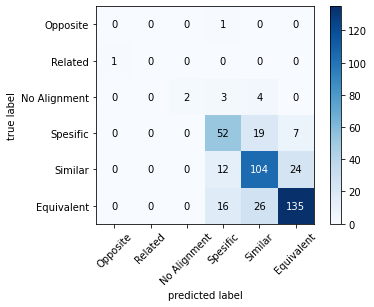

In [44]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')
y_prob = historyadam.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
rounded_labels=np.argmax(Y_test, axis=1)
mat = confusion_matrix(rounded_labels, y_pred)
class_names = ['Opposite','Related', 'No Alignment', 'Spesific', 'Similar', 'Equivalent']
plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.Blues, colorbar=True)
print(classification_report(rounded_labels, y_pred))
#plot_cm(history, X_test, Y_test)

# Confusion Matrix Adadelta

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      0.44      0.62         9
           3       0.67      0.72      0.69        78
           4       0.64      0.71      0.67       140
           5       0.80      0.73      0.77       177

    accuracy                           0.71       406
   macro avg       0.68      0.60      0.62       406
weighted avg       0.72      0.71      0.71       406



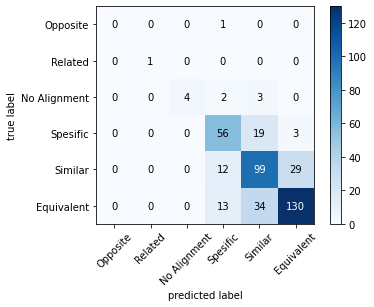

In [45]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_prob = historyadadelta.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
rounded_labels=np.argmax(Y_test, axis=1)
mat = confusion_matrix(rounded_labels, y_pred)
class_names = ['Opposite','Related', 'No Alignment', 'Spesific', 'Similar', 'Equivalent']
plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.Blues, colorbar=True)
print(classification_report(rounded_labels, y_pred))
#plot_cm(history, X_test, Y_test)

# Confusion Matrix SGD

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.50      0.33      0.40         9
           3       0.68      0.73      0.70        78
           4       0.64      0.67      0.66       140
           5       0.78      0.75      0.77       177

    accuracy                           0.71       406
   macro avg       0.43      0.41      0.42       406
weighted avg       0.70      0.71      0.70       406



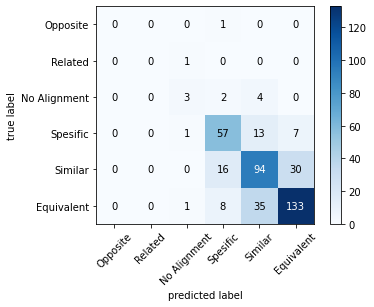

In [46]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')
y_prob = historysgd.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
rounded_labels=np.argmax(Y_test, axis=1)
mat = confusion_matrix(rounded_labels, y_pred)
class_names = ['Opposite','Related', 'No Alignment', 'Spesific', 'Similar', 'Equivalent']
plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.Blues, colorbar=True)
print(classification_report(rounded_labels, y_pred))
#plot_cm(history, X_test, Y_test)

# Plot Accuracy Adam

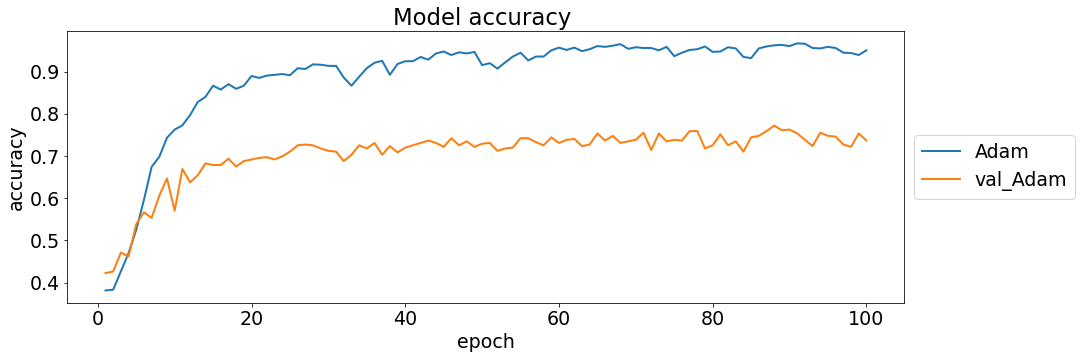

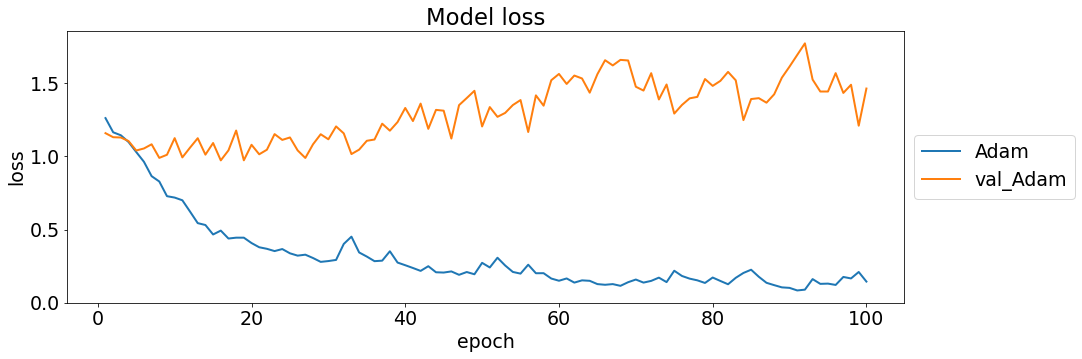

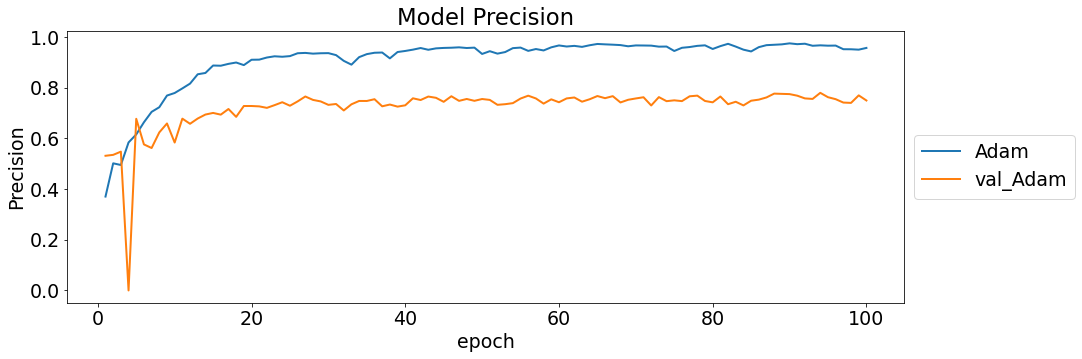

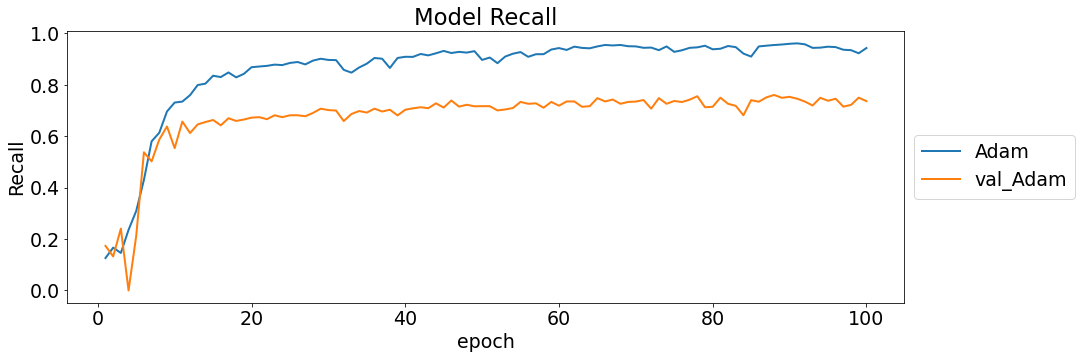

In [47]:
log_data = pd.read_csv('hybridadam.log', sep=',', engine='python') 
plot_history_model(log_data, "Adam", iterasi)

# Plot Accuracy Adadelta

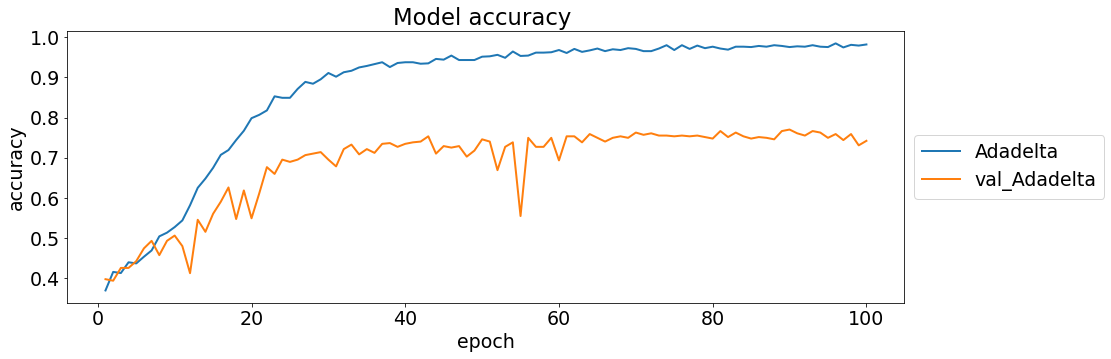

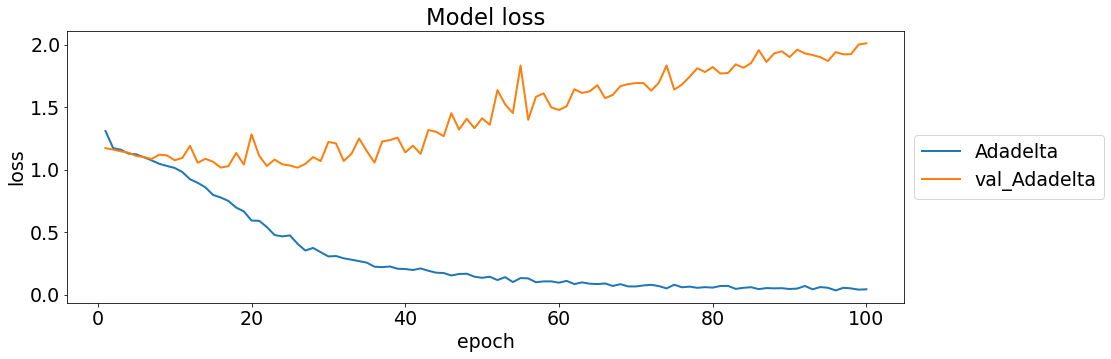

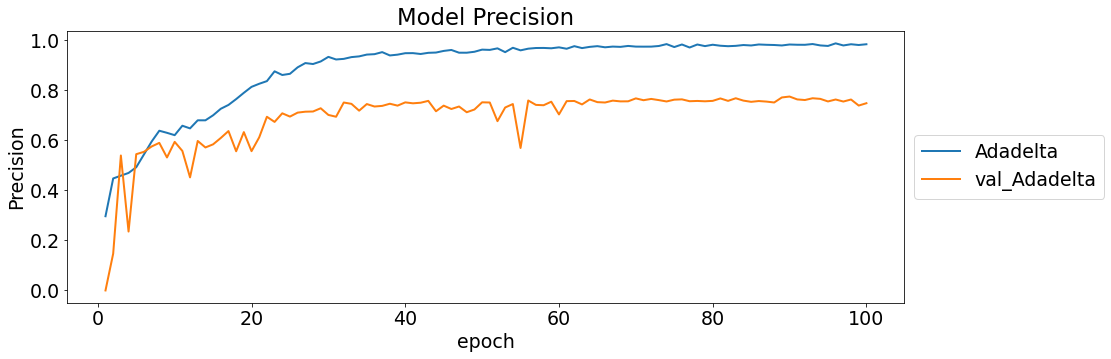

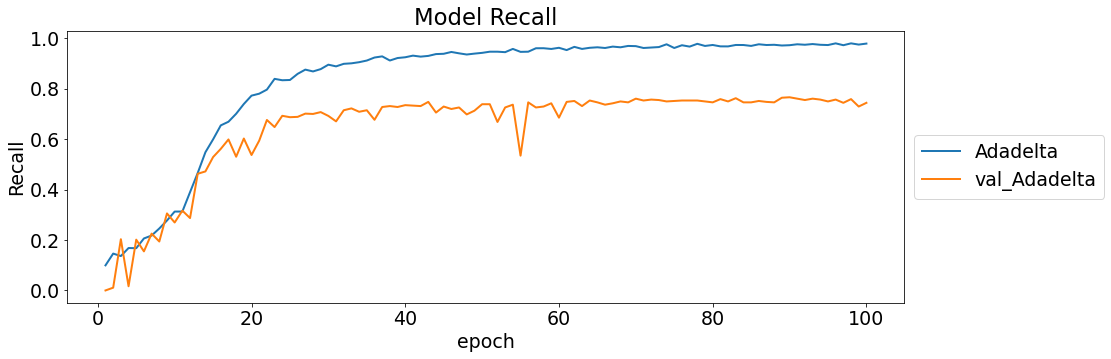

In [48]:
log_data = pd.read_csv('hybridadadelta.log', sep=',', engine='python') 
plot_history_model(log_data, "Adadelta", iterasi)

# Plot Accuracy SGD

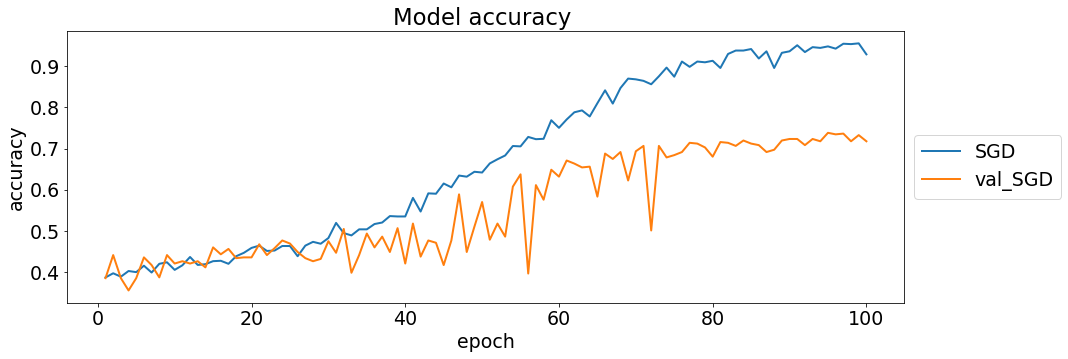

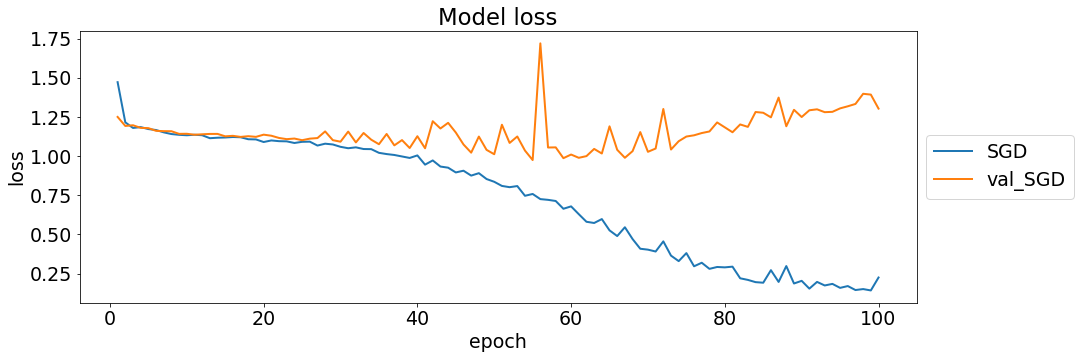

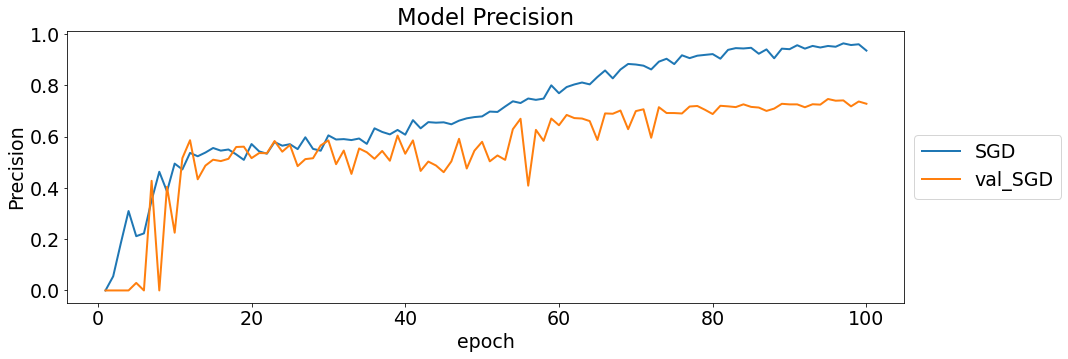

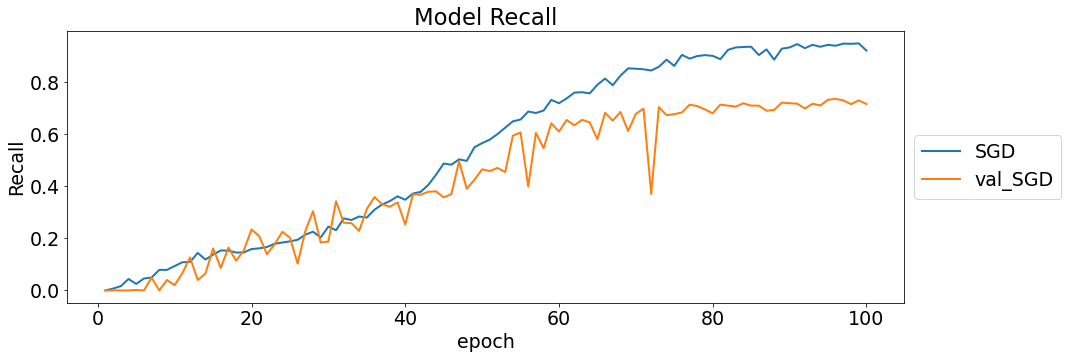

In [49]:
log_data = pd.read_csv('hybridsgd.log', sep=',', engine='python') 
plot_history_model(log_data, "SGD", iterasi)